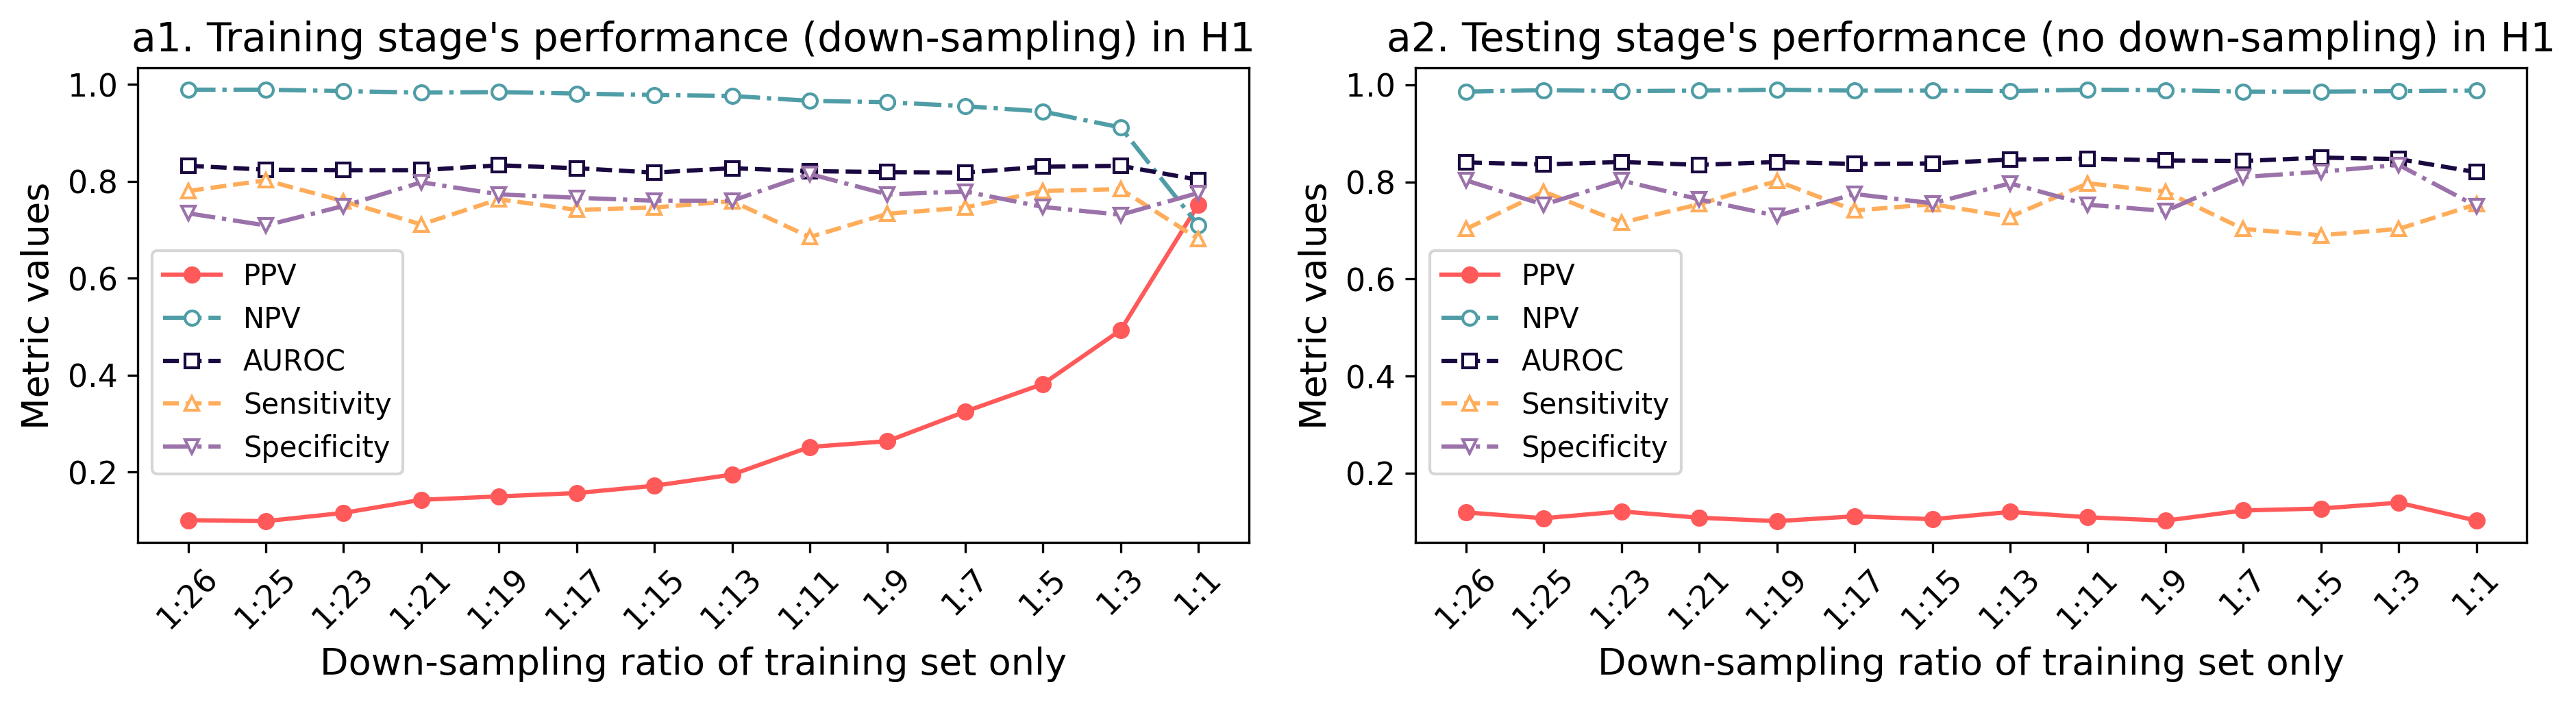

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# color palette
color_palette = {
    'PPV':        (255/255, 89/255, 89/255),    # red
    'NPV':        (79/255, 157/255, 166/255),   # teal
    'AUROC':      (26/255, 8/255, 65/255),      # purple
    'Sensitivity':(255/255, 173/255, 90/255),   # orange
    'Specificity':(155/255, 114/255, 170/255)   # soft purple
}

# figure setup
fig, axs = plt.subplots(1, 2, figsize=(15, 3), dpi=300)

## titles and labels
pre_titles = ['a1','a2']
db = 'GDPH' ## change to your database folder name
db_rename = 'H1' ## change to your database name
titles = [
    f"Training stage's performance (down-sampling) in {db_rename}",
    f"Testing stage's performance (no down-sampling) in {db_rename}"
]

metrics = ['PPV', 'NPV', 'AUROC', 'Sensitivity', 'Specificity']
markers = ['o', 'o', 's', '^', 'v']
linestyles = ['-', '-.', 'dashed', '--', '-.']

for j,folder in enumerate(['4.1-downsampling_models_compare','4.2-downsampling_models_compare']):
    cd = r'./'

    '''
    change the path to your own path
    '''
    search_path1 = cd + folder + '/' + db + '/'
    flie = search_path1 + 'youden_index.csv'
    
    model_index_result = pd.read_csv(flie)
    
    model_index_result['Fraction(negative:positive)'] = model_index_result['Fraction(negative:positive)'].apply(lambda x:x.split(':')[0])
    # model_index_result['Fraction(negative:positive)'] = model_index_result['Fraction(negative:positive)'].astype(int)
    temp = model_index_result['Fraction(negative:positive)'].astype(int).values
    # temp1 = [str(x) for x in temp if x % 2 == 1]
    temp1 = ['26'] + [str(x) for x in temp if x % 2 == 1]
    
    model_index_result = model_index_result[model_index_result['Fraction(negative:positive)'].isin(temp1)]
    # print(model_index_result)
    
    model_index_result['Fraction(negative:positive)'] = model_index_result['Fraction(negative:positive)'].apply(lambda x:str(1)+':'+str(x))

    x = model_index_result['Fraction(negative:positive)']
    y_data = [
        model_index_result['PPV'],
        model_index_result['NPV'],
        model_index_result['AUC'],
        model_index_result['Sens(Rec/TPR)'],
        model_index_result['Spec']
    ]

    # draw
    for idx, (y, label) in enumerate(zip(y_data, metrics)):
        axs[j].plot(
            x, y, label=label,
            marker=markers[idx],
            linestyle=linestyles[idx],
            color=color_palette[label],
            markersize=5,
            markerfacecolor='white' if label != 'PPV' else color_palette[label]  # PPV filled marker
        )

    axs[j].set_xlabel('Down-sampling ratio of training set only', fontsize=13)
    axs[j].set_ylabel('Metric values', fontsize=13)
    axs[j].set_title(f'{pre_titles[j]}. {titles[j]}', fontsize=14)
    axs[j].set_xticklabels(x, rotation=45)
    axs[j].tick_params(axis='both', which='major', labelsize=11)

    if j == 0:
        axs[j].legend(loc='center left', bbox_to_anchor=(0, 0.38), fontsize=10)
    else:
        axs[j].legend(loc='center left', bbox_to_anchor=(0, 0.38), fontsize=10)

plt.subplots_adjust(wspace=0.15)
plt.show()